<a href="https://colab.research.google.com/github/AndrewCrossman/Graduate_Research/blob/main/G_g_p_p0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
from astropy.coordinates import cartesian_to_spherical
import pandas as pd
import scipy as sp
from sklearn.neighbors import KDTree
from scipy import optimize
from google.colab import files
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


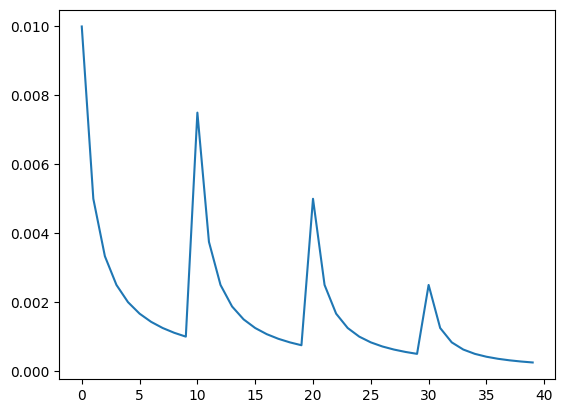

In [6]:
# CHecks whether the sigams in RMC code are acting as thought
loop1 = 4
loop2 = 10
beta = 1
sig_0 = 0.01
sigmas = []
for i in np.arange(1,loop1+1,1):
  sig_1 = sig_0*(loop1-i+1)/loop1
  for j in np.arange(1,loop2+1,1):
    sig_2 = sig_1/(j*beta)
    sigmas.append(sig_2)
plt.plot(sigmas)

In [2]:
###############################################################################
# Data taken from a r=75A Au FCC Sphere
###############################################################################
NN_distance = [np.sqrt(1/2), np.sqrt(2/2), np.sqrt(3/2), np.sqrt(4/2), np.sqrt(5/2), np.sqrt(6/2), np.sqrt(7/2), np.sqrt(8/2), np.sqrt(9/2), np.sqrt(10/2),
            np.sqrt(11/2), np.sqrt(12/2), np.sqrt(13/2), np.sqrt(14/2), np.sqrt(15/2), np.sqrt(16/2), np.sqrt(17/2), np.sqrt(18/2), np.sqrt(19/2), np.sqrt(20/2),
            np.sqrt(21/2), np.sqrt(22/2), np.sqrt(23/2), np.sqrt(24/2), np.sqrt(25/2), np.sqrt(26/2), np.sqrt(27/2)]
NN_count = [12, 6, 24, 12, 24, 8, 48, 6, 36, 24,
         24, 24, 72, 0, 48, 12, 48, 30, 72, 24,
         48, 24, 48, 8, 84, 24, 96]

In [3]:
file = "https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Control/STRs/Sphere100_Au_onAu_voidless.stru"
lp = 4.0789

In [4]:
data = pd.read_csv(file, skiprows=3)
data = data.drop(data.columns[3:], axis=1)
data[["atoms", "x"]] = data[data.columns[0]].str.split(expand=True)
data = data.drop(data.columns[0], axis=1)
data = data.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)
data["x"] = data["x"].astype(float)
data["y"] = data["y"].astype(float)
data["z"] = data["z"].astype(float)

<ipython-input-4-14b7be25f260>:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data = data.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)


In [5]:
atom = data.atom
data = data.drop(data.columns[2], axis=1)

In [6]:
data

,y,z,x
0,-2.5,-5.5,-1.0
1,-2.5,-5.5,0.0
2,-2.5,-5.5,1.0
3,-1.5,-5.5,-2.0
4,-2.0,-5.5,-1.5
...,...,...,...
3920,0.5,6.0,-0.5
3921,0.0,6.0,0.0
3922,0.5,6.0,0.5
3923,0.0,6.0,1.0


In [7]:
data_ar = data.to_numpy()
#tree = KDTree(data_ar, leaf_size=2)
#all_nn_indices = tree.query_radius(data_ar, r=np.sqrt(2)*1)

In [8]:
r_min = .1
r_max = np.sqrt(6/2)*lp
bin_size = r_max/50

r_range = np.arange(r_min,r_max+bin_size, bin_size)
rho_r = []
N = len(data_ar)
for r in r_range:
  print(r)
  count = 0
  for i in data_ar:
    for j in data_ar:
      if abs(r-np.linalg.norm(i-j)*lp) <= bin_size/2:    # finds the distance between the atom at index i and index n
        count = count +1
  rho_r.append( 1/(4*np.pi*r*r*N) * count)

0.1
0.24129724077985387
0.38259448155970777
0.5238917223395616
0.6651889631194154
0.8064862038992693
0.9477834446791232
1.0890806854589772
1.230377926238831
1.3716751670186849
1.5129724077985387
1.6542696485783925
1.7955668893582466
1.9368641301381004
2.0781613709179543
2.219458611697808
2.360755852477662
2.502053093257516
2.6433503340373696
2.7846475748172237
2.9259448155970773
3.0672420563769314
3.208539297156785
3.349836537936639
3.491133778716493
3.6324310194963467
3.773728260276201
3.9150255010560544
4.056322741835908
4.197619982615762
4.338917223395615
4.48021446417547
4.621511704955323
4.762808945735177
4.9041061865150315
5.045403427294885
5.186700668074739
5.327997908854592
5.469295149634447
5.6105923904143005
5.751889631194154
5.893186871974009
6.034484112753862
6.175781353533716
6.317078594313569
6.458375835093424
6.599673075873278
6.740970316653131
6.882267557432986
7.023564798212839
7.164862038992693


Text(0.5, 0, '$r(\\AA)$')

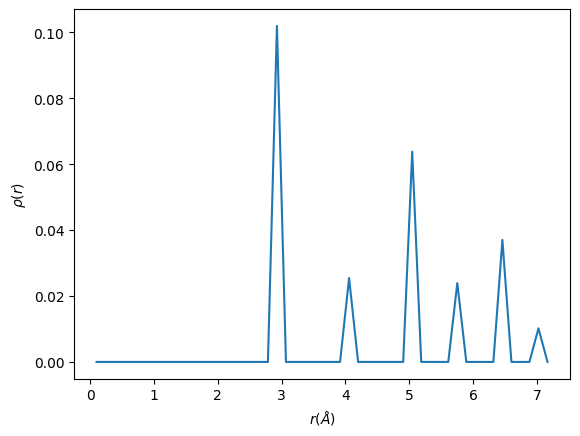

In [9]:
plt.plot(r_range,rho_r)
plt.ylabel(r'$\rho(r)$')
plt.xlabel(r'$r(\AA)$')

In [10]:
rho_0 = (3*N/(4*np.pi*r_max*r_max*r_max))
g_r = [x*rho_0 for x in rho_r]

Text(0.5, 0, '$r(\\AA)$')

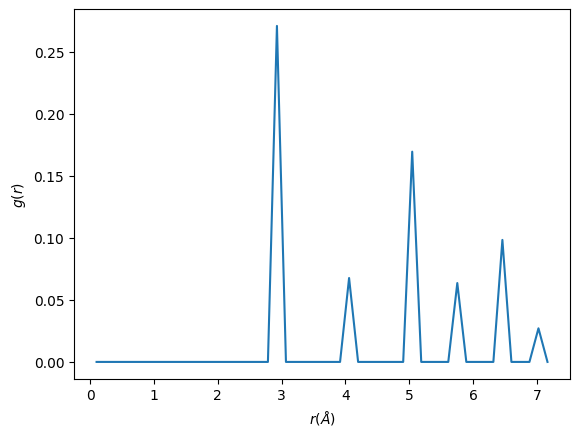

In [11]:
plt.plot(r_range,g_r)
plt.ylabel(r'$g(r)$')
plt.xlabel(r'$r(\AA)$')

In [12]:
G_r = [4*np.pi*rho_0*r_range[i]*(g_r[i]-1) for i in range(len(g_r))]

Text(0.5, 0, '$r(\\AA)$')

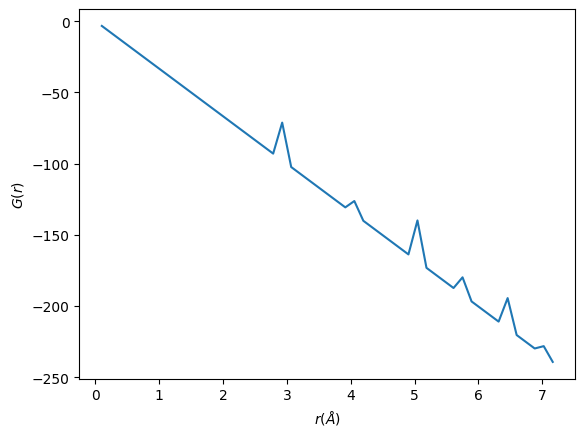

In [13]:
plt.plot(r_range,G_r)
plt.ylabel(r'$G(r)$')
plt.xlabel(r'$r(\AA)$')